In [1]:
def fib1(n):
    assert n >= 0
    return n if n <= 1 else fib1(n - 1) + fib1(n - 2) 
fib1(16)

987

In [2]:
from rcviz import viz

In [3]:
old_fib1 = fib1

In [4]:
fib1 = viz(fib1)

In [5]:
fib1(5)

rendered to fib1.png


/home/alina/stepik-algorithms-course/venv/lib/python3.6/site-packages/pygraphviz/agraph.py:1367: RuntimeWarning: Warning: flat edge between adjacent nodes one of which has a record shape - replace records with HTML-like labels
  Edge 48055928 -> 48157912
Error: lost 48039128 47966408 edge
Error: lost 39579656 48160664 edge
Error: lost 48055928 48157912 edge
Error: lost 47971624 44775880 edge
Error: lost 48054808 48055336 edge
Error: lost 47966936 47968520 edge
Error: lost 47967464 47967992 edge

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


5

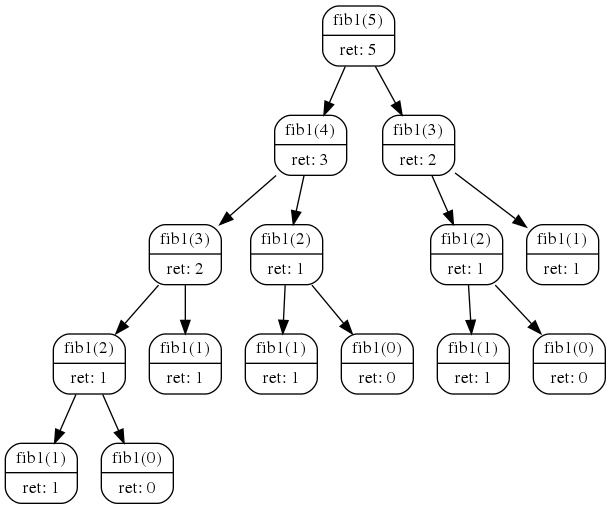

In [6]:
from IPython.display import Image
Image(filename='fib1.png') 

In [7]:
cache = {}
def fib2(n):
    assert n >= 0
    if n not in cache:
        cache[n] = n if n <= 1 else fib2(n - 1) + fib2(n - 2)
    return cache[n]

In [8]:
fib2(16)

987

In [9]:
fib2(800)

69283081864224717136290077681328518273399124385204820718966040597691435587278383112277161967532530675374170857404743017623467220361778016172106855838975759985190398725

In [10]:
fib2 = viz(fib2)

In [14]:
fib2(5)

rendered to fib2.png


/home/alina/stepik-algorithms-course/venv/lib/python3.6/site-packages/pygraphviz/agraph.py:1367: RuntimeWarning: Warning: flat edge between adjacent nodes one of which has a record shape - replace records with HTML-like labels
  Edge 140672258603752 -> 48158440
Error: lost 140672258603752 48158440 edge
Error: lost 47968520 48321048 edge
Error: lost 47967992 48320520 edge
Error: lost 47966936 48231864 edge

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


5

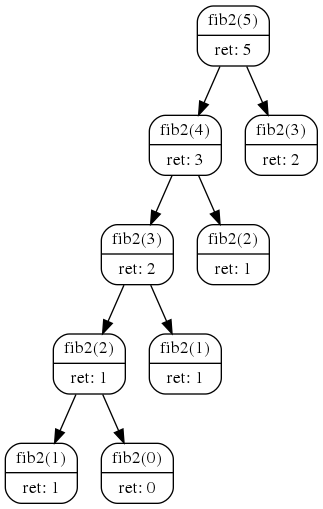

In [15]:
Image(filename='fib2.png') 

In [13]:
cache.clear()

In [16]:
def memo(f):
    cache = {}
    def inner(n):
        if n not in cache:
            cache[n] = f(n)
        return cache[n]
    return inner


In [17]:
fib1 = memo(old_fib1)

In [18]:
fib1(80)

23416728348467685

In [19]:
from functools import lru_cache

In [20]:
fib1 = lru_cache(maxsize=None)(old_fib1)

In [21]:
fib1(80)

23416728348467685

In [38]:
def fib3(n):
    assert n >= 0
    f0, f1 = 0, 1
    for i in range(n-1):
        f0, f1 = f1, f0 + f1
    return f1

In [43]:
fib3(16)

987

In [24]:
fib1(8000)

RecursionError: maximum recursion depth exceeded in comparison

In [25]:
fib3(8000)

3561533204460626739768914905427460387141369539110154082973500638991885819498711815304829246223963373749873423083216889782034228521693267175594214186111978816819236959743284321273097535654614718808050244321699002512466203835566030351092652496815708455980825654877181538741827129421689128991879649533246136168998590044965735035810856774605383628378979290580539135791985063484992877932473487054068899476937399295193905527420792975902913836012199062687063537510151753758100626402591751183925883151617648375005313453493271681248233059858496951790113255897429539560654496639601132039360167542277472498901884679404509894269174519328918160745655327632006736189766801968534195725815421784083495026969542066047758885029695257263330719223956309043195653930347983496830801755572982419821881275569179922973415736010289561700699477021488635509784509168019589640190234350021673802856836365767446249424907273016689053388000785637444921523414602360860001530139933615215383220927084750528293779491002813557093860863839

In [26]:
import time

In [27]:
def timed(f, *args, n_iter=100):
    acc = float("inf")
    for i in range(n_iter):
        t0 = time.perf_counter()
        f(*args)
        t1 = time.perf_counter()
        acc = min(acc, t1 - t0)
    return acc


In [47]:
timed(fib3, 800)

6.228400161489844e-05

In [30]:
from matplotlib import pyplot as plt

In [48]:
def compare(fs, args):
    for f in fs:
        plt.plot(args, [timed(f, arg) for arg in args], label=f.__name__)
    plt.legend()
    plt.grid(True)

In [32]:
fib1 = old_fib1

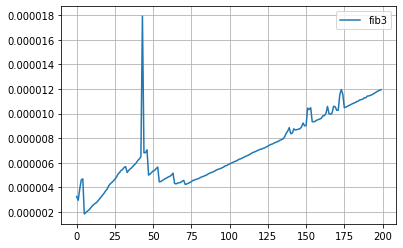

In [65]:
compare([fib3], list(range(200)))